In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
# Load the data
data = pd.read_csv('IPL_matches.csv')

In [44]:
# Display the first few rows of the dataset
print(data.head())


   id  season       city        date                        team1  \
0   1    2017  Hyderabad  05-04-2017          Sunrisers Hyderabad   
1   2    2017       Pune  06-04-2017               Mumbai Indians   
2   3    2017     Rajkot  07-04-2017                Gujarat Lions   
3   4    2017     Indore  08-04-2017       Rising Pune Supergiant   
4   5    2017  Bangalore  08-04-2017  Royal Challengers Bangalore   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1       Rising Pune Supergiant       Rising Pune Supergiant         field   
2        Kolkata Knight Riders        Kolkata Knight Riders         field   
3              Kings XI Punjab              Kings XI Punjab         field   
4             Delhi Daredevils  Royal Challengers Bangalore           bat   

   result  dl_applied                       winner  win_by_runs  \
0  normal           0          Sunrisers Hyderabad     

In [45]:
# Check for missing values
print(data.isnull().sum())

id                 0
season             0
city               7
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             3
win_by_runs        0
win_by_wickets     0
player_of_match    3
venue              0
umpire1            1
umpire2            1
dtype: int64


In [46]:
# Convert date column to datetime format
data['date'] = pd.to_datetime(data['date'],format="%d-%m-%Y")

In [47]:
# Summary statistics
print(data.describe())

               id       season                           date  dl_applied  \
count  636.000000   636.000000                            636  636.000000   
mean   318.500000  2012.490566  2012-10-24 20:52:04.528302080    0.025157   
min      1.000000  2008.000000            2008-04-18 00:00:00    0.000000   
25%    159.750000  2010.000000            2010-04-11 00:00:00    0.000000   
50%    318.500000  2012.000000            2012-05-21 00:00:00    0.000000   
75%    477.250000  2015.000000            2015-04-22 00:00:00    0.000000   
max    636.000000  2017.000000            2017-05-21 00:00:00    1.000000   
std    183.741666     2.773026                            NaN    0.156726   

       win_by_runs  win_by_wickets  
count   636.000000      636.000000  
mean     13.682390        3.372642  
min       0.000000        0.000000  
25%       0.000000        0.000000  
50%       0.000000        4.000000  
75%      20.000000        7.000000  
max     146.000000       10.000000  
std      2

In [48]:
# Basic Data Overview
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               636 non-null    int64         
 1   season           636 non-null    int64         
 2   city             629 non-null    object        
 3   date             636 non-null    datetime64[ns]
 4   team1            636 non-null    object        
 5   team2            636 non-null    object        
 6   toss_winner      636 non-null    object        
 7   toss_decision    636 non-null    object        
 8   result           636 non-null    object        
 9   dl_applied       636 non-null    int64         
 10  winner           633 non-null    object        
 11  win_by_runs      636 non-null    int64         
 12  win_by_wickets   636 non-null    int64         
 13  player_of_match  633 non-null    object        
 14  venue            636 non-null    object   

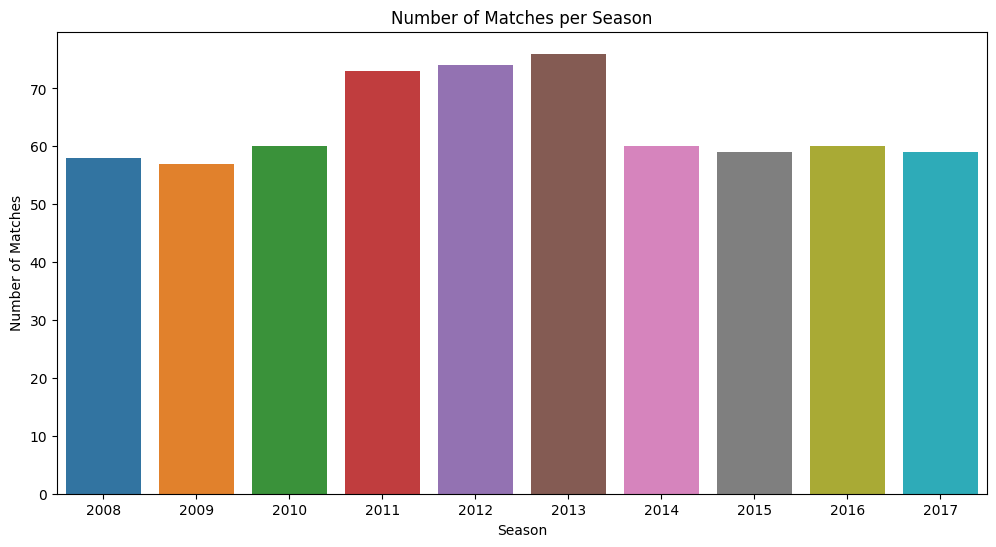

In [49]:
# Exploratory Data Analysis

# Number of matches per season
plt.figure(figsize=(12, 6))
sns.countplot(x='season', data=data)
plt.title('Number of Matches per Season')
plt.xlabel('Season')
plt.ylabel('Number of Matches')
plt.show()

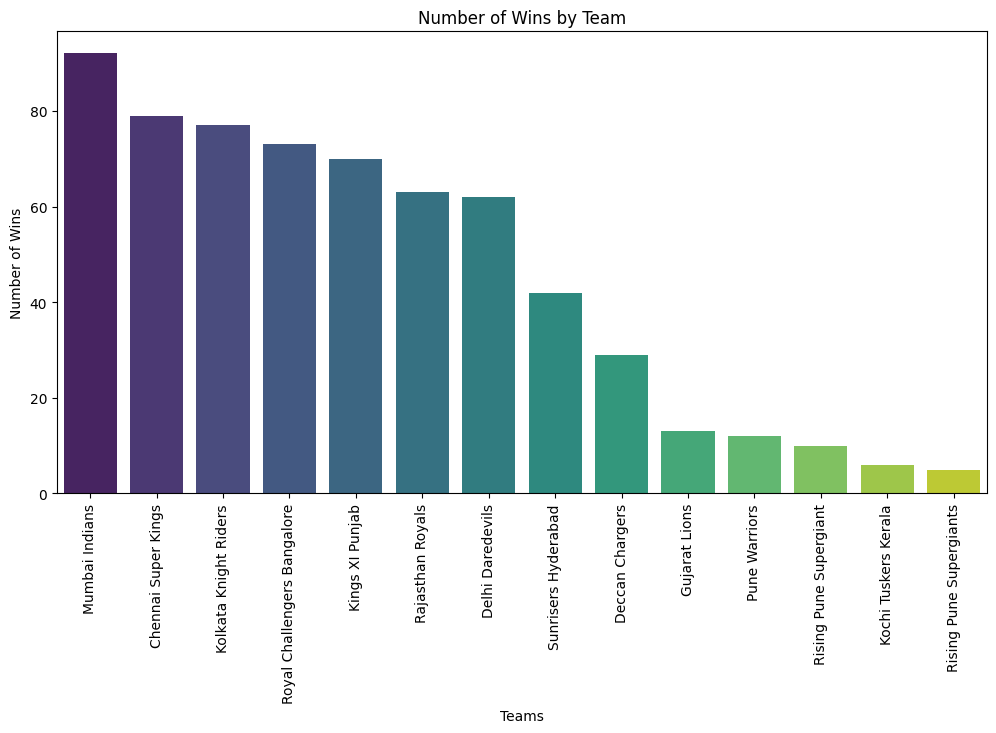

In [50]:
# Number of wins by each team
plt.figure(figsize=(12, 6))
team_wins = data['winner'].value_counts()
sns.barplot(x=team_wins.index, y=team_wins.values, palette='viridis')
plt.title('Number of Wins by Team')
plt.xlabel('Teams')
plt.ylabel('Number of Wins')
plt.xticks(rotation=90)
plt.show()

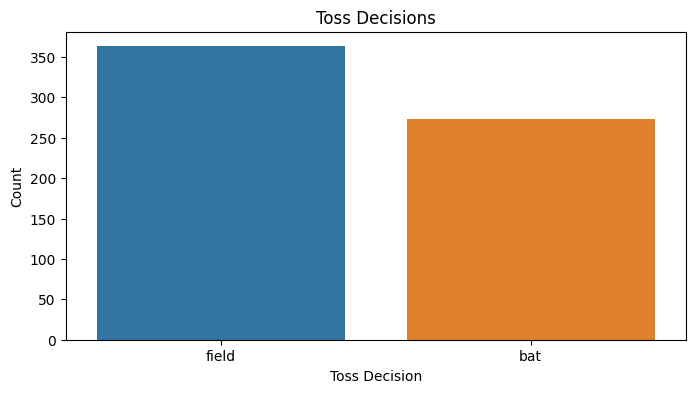

In [51]:
# Toss decisions (bat/field)
plt.figure(figsize=(8, 4))
sns.countplot(x='toss_decision', data=data)
plt.title('Toss Decisions')
plt.xlabel('Toss Decision')
plt.ylabel('Count')
plt.show()

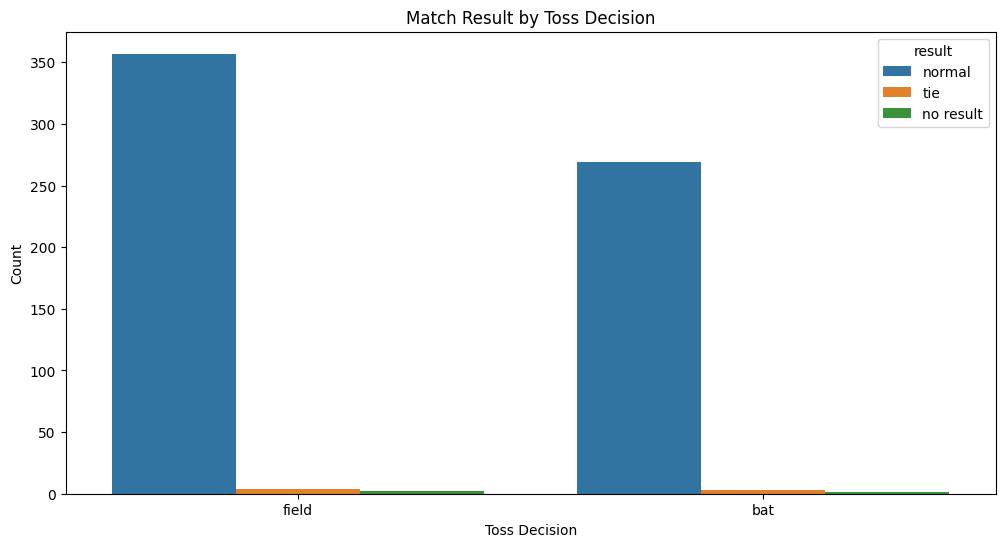

In [52]:
# Wins by batting or fielding first
plt.figure(figsize=(12, 6))
sns.countplot(x='toss_decision', hue='result', data=data)
plt.title('Match Result by Toss Decision')
plt.xlabel('Toss Decision')
plt.ylabel('Count')
plt.show()

c:\Users\abini\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


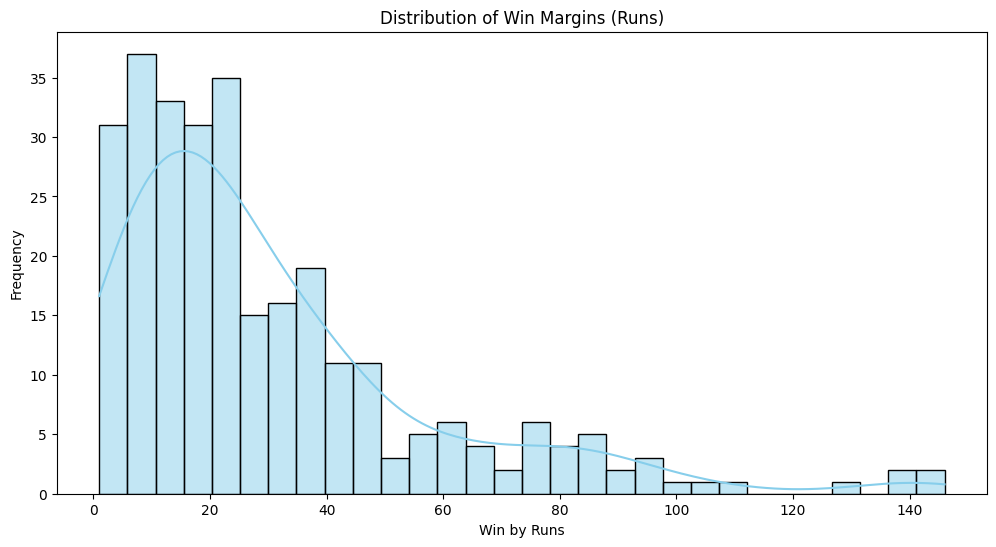

In [53]:
# Distribution of win margins (runs)
plt.figure(figsize=(12, 6))
sns.histplot(data[data['win_by_runs'] > 0]['win_by_runs'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Win Margins (Runs)')
plt.xlabel('Win by Runs')
plt.ylabel('Frequency')
plt.show()

c:\Users\abini\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


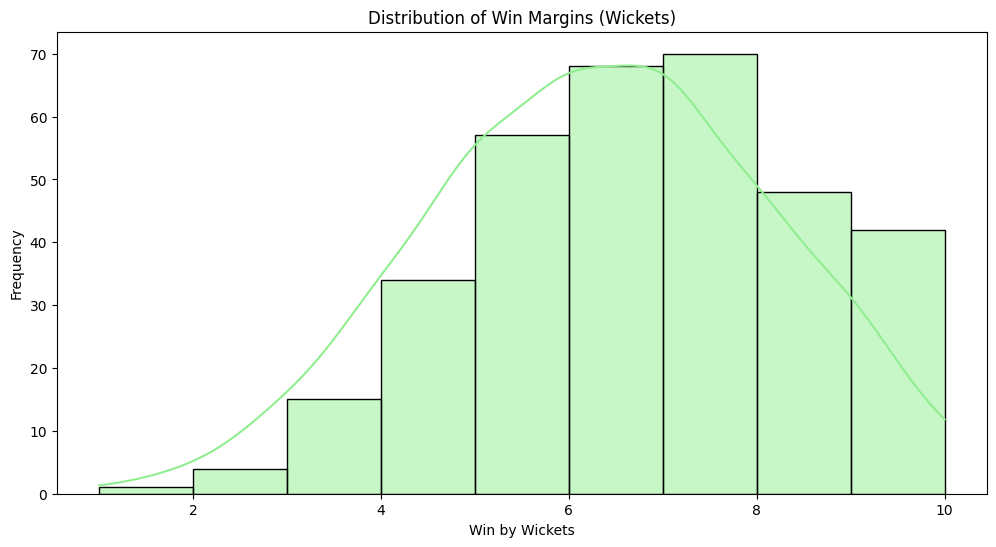

In [54]:

# Distribution of win margins (wickets)
plt.figure(figsize=(12, 6))
sns.histplot(data[data['win_by_wickets'] > 0]['win_by_wickets'], bins=9, kde=True, color='lightgreen')
plt.title('Distribution of Win Margins (Wickets)')
plt.xlabel('Win by Wickets')
plt.ylabel('Frequency')
plt.show()

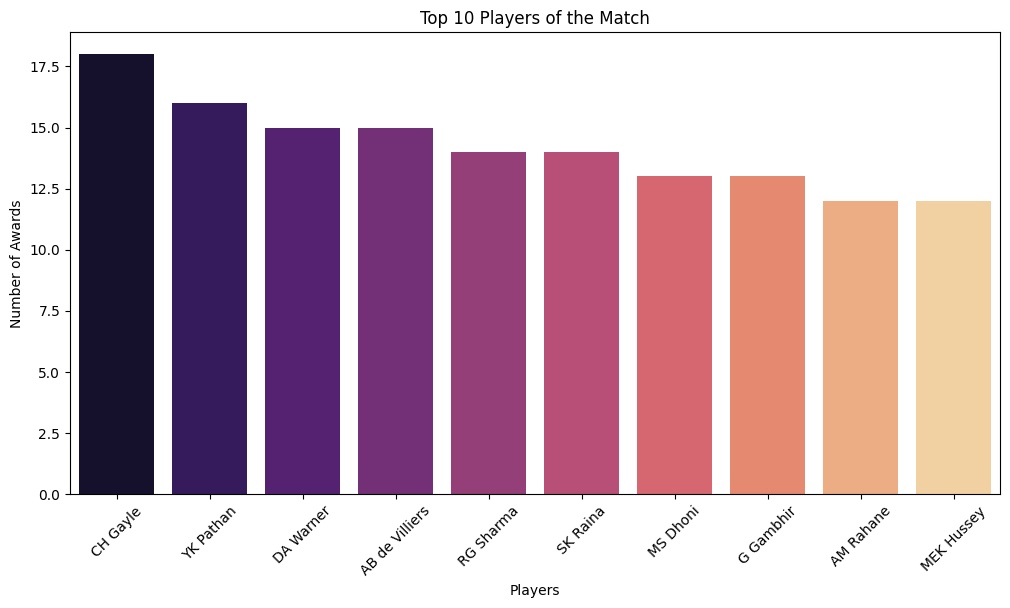

In [55]:

# Player of the Match awards
plt.figure(figsize=(12, 6))
top_players = data['player_of_match'].value_counts().head(10)
sns.barplot(x=top_players.index, y=top_players.values, palette='magma')
plt.title('Top 10 Players of the Match')
plt.xlabel('Players')
plt.ylabel('Number of Awards')
plt.xticks(rotation=45)
plt.show()

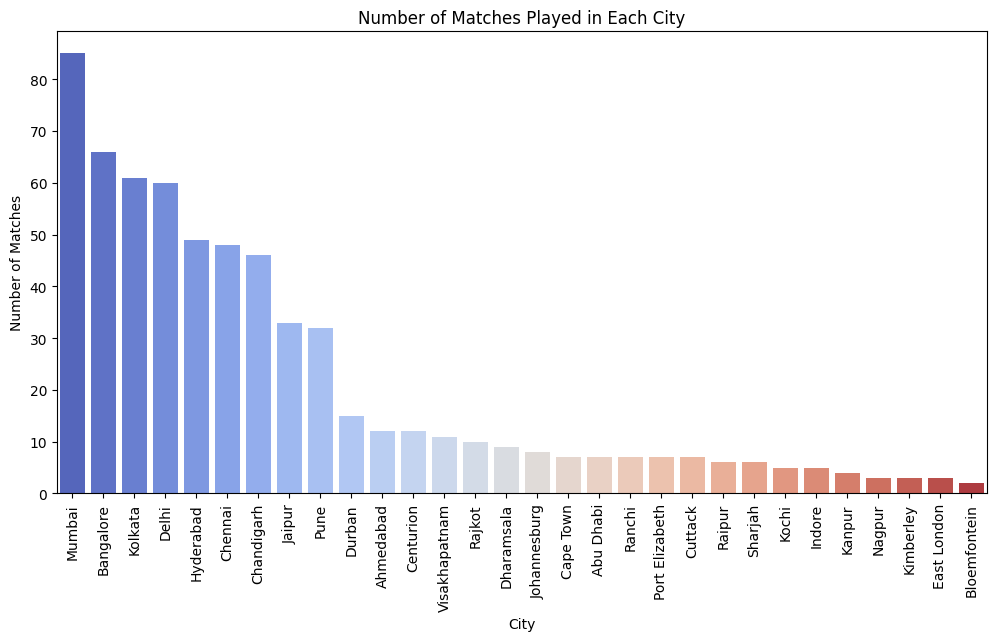

In [56]:
# Matches played in each city
plt.figure(figsize=(12, 6))
city_matches = data['city'].value_counts()
sns.barplot(x=city_matches.index, y=city_matches.values, palette='coolwarm')
plt.title('Number of Matches Played in Each City')
plt.xlabel('City')
plt.ylabel('Number of Matches')
plt.xticks(rotation=90)
plt.show()

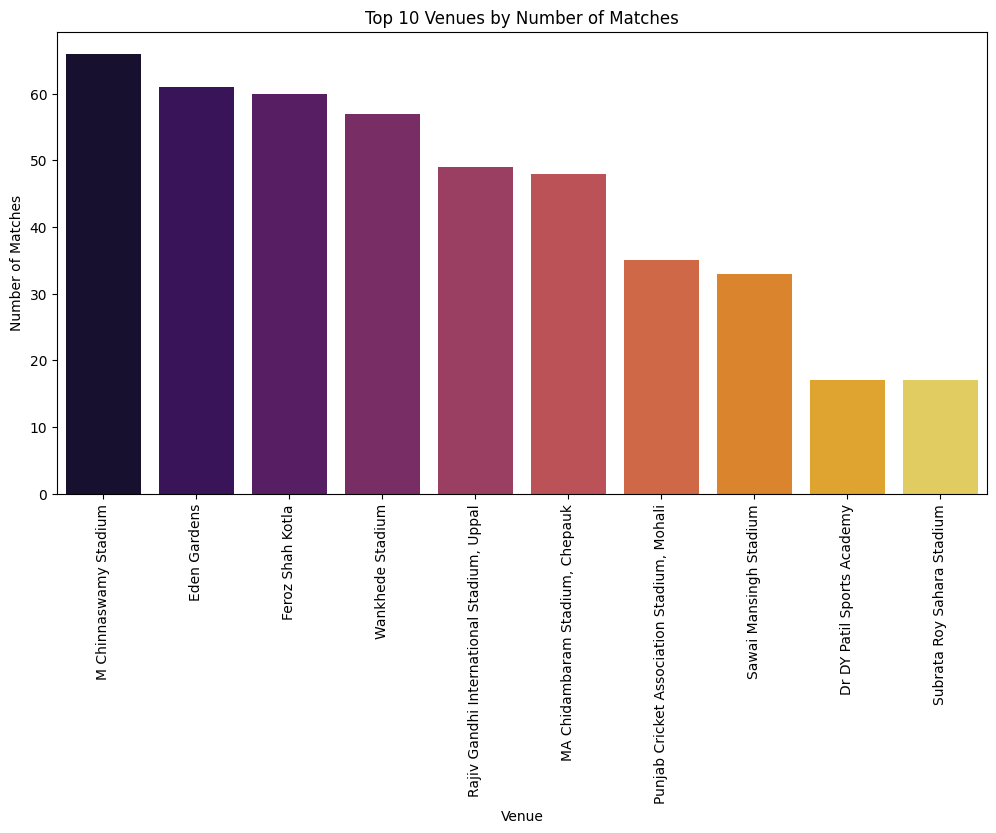

In [57]:
# Venue Analysis
plt.figure(figsize=(12, 6))
venue_matches = data['venue'].value_counts().head(10)
sns.barplot(x=venue_matches.index, y=venue_matches.values, palette='inferno')
plt.title('Top 10 Venues by Number of Matches')
plt.xlabel('Venue')
plt.ylabel('Number of Matches')
plt.xticks(rotation=90)
plt.show()
